C:\Users\NAVEENA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 25.837076365248976
R2 Score: 0.6476783925252603


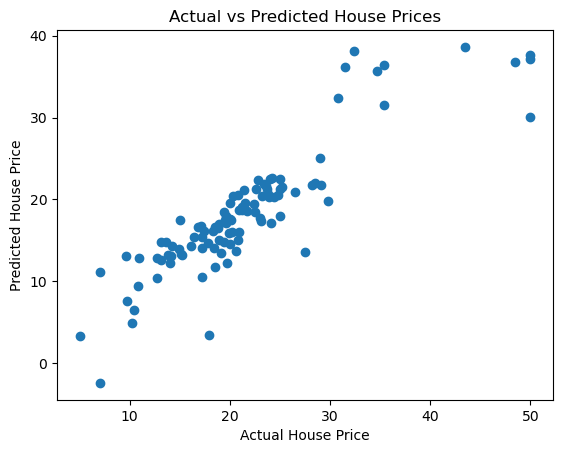


Sample Predictions:
Actual: 23.60, Predicted: 21.64
Actual: 32.40, Predicted: 38.08
Actual: 13.60, Predicted: 14.85
Actual: 22.80, Predicted: 22.36
Actual: 16.10, Predicted: 14.30


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("BostonHousing.csv")

# Separate input features and target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MLP model (Linear Regression)
mlp = MLPRegressor(
    hidden_layer_sizes=(),     # No hidden layer
    activation='identity',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42
)

# Train model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# ---------------- GRAPH ----------------
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Sample predictions
print("\nSample Predictions:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i]:.2f}")
